In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
df_data=pd.read_csv("Churn_Modelling.csv")
df_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
drop_column=['CustomerId','Surname','Age']
df.drop(drop_column,axis=1,inplace=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,2,125510.82,1,1,1,79084.10,0


In [10]:
df.isnull().sum()

RowNumber          0
CreditScore        0
Geography          0
Gender             0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.nunique()

RowNumber          10000
CreditScore          460
Geography              3
Gender                 2
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [14]:
df_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
gen_l={'Female':0,'Male':1}
geo_l={'France':0,'Germany':1,'Spain':2}
df['Gender']=df['Gender'].map(gen_l)
df['Geography']=df['Geography'].map(geo_l)
df.head()

,RowNumber,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,2,125510.82,1,1,1,79084.10,0


In [16]:
df_data1=pd.get_dummies(df,drop_first=True)
df_data1=df_data1.astype(int)
df_data1.head()


,RowNumber,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,2,0,1,1,1,101348,1
1,2,608,2,0,1,83807,1,0,1,112542,0
2,3,502,0,0,8,159660,3,1,0,113931,1
3,4,699,0,0,1,0,2,0,0,93826,0
4,5,850,2,0,2,125510,1,1,1,79084,0


In [19]:
df_data1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

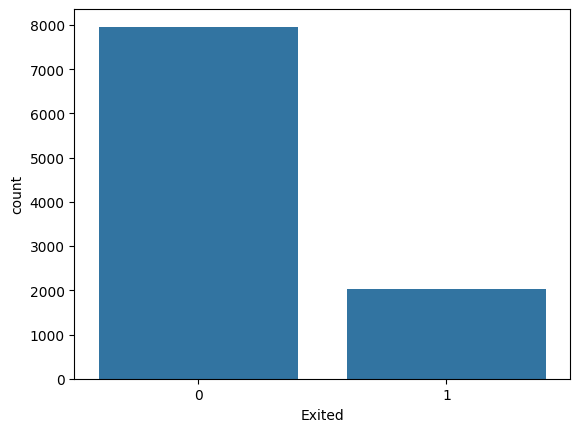

In [20]:
sns.countplot(x='Exited',data=df_data1)

In [21]:
x=df_data1.drop('Exited',axis=1)
y=df_data1.Exited

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [23]:
ss=StandardScaler()
x_tr_ss=ss.fit_transform(x_train)
x_te_ss=ss.fit_transform(x_test)

In [24]:
limit=0.5
y_tr_cl=[1 if value > limit else 0 for value in y_train]
y_te_cl=[1 if value > limit else 0 for value in y_test]
LR=LogisticRegression()
LR.fit(x_tr_ss,y_tr_cl)

LogisticRegression()

In [25]:
acr=LR.score(x_te_ss,y_te_cl)
acr

0.789

In [26]:
from sklearn import svm
svm=svm.SVC()
svm.fit(x_tr_ss,y_tr_cl)
acr1=svm.score(x_te_ss,y_te_cl)
acr1

0.814

In [27]:
rf=RandomForestClassifier()
rf.fit(x_tr_ss,y_tr_cl)
acr2=rf.score(x_te_ss,y_te_cl)
acr2

0.8205

In [28]:
dt=DecisionTreeClassifier()
dt.fit(x_tr_ss,y_tr_cl)
acr3=dt.score(x_te_ss,y_te_cl)
acr3

0.745

In [30]:
knn=KNeighborsClassifier()
knn.fit(x_tr_ss,y_tr_cl)
acr4=knn.score(x_te_ss,y_te_cl)
acr4

0.7885

In [35]:
performance_table=pd.DataFrame({
    'Model':['Logistic Regression','SVM','Random Forest','Decision Tree','KNN'],
    'Accuracy':[acr,acr1,acr2,acr3,acr4]})
performance_table

,Model,Accuracy
0,Logistic Regression,0.7890
1,SVM,0.8140
2,Random Forest,0.8205
3,Decision Tree,0.7450
4,KNN,0.7885
